In [40]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
from neo4j import GraphDatabase
from unidecode import unidecode

def get_neo4j_results_of(query):
    # Récupération des informations de connexion à la base
    # URI = st.secrets["AURA_CONNECTION_URI"]
    # USER = st.secrets["AURA_USERNAME"]
    # PASS = st.secrets["AURA_PASSWORD"]

    URI = "neo4j+s://72c2ce2d.databases.neo4j.io"
    USER = "neo4j"
    PASS = "iZFjjdEUnier6yXdph9O1bIOVOe_c82S1zDFcdzf5Ds"
    
    # Driver instantiation
    driver = GraphDatabase.driver(URI, auth=(USER, PASS))

    # Create a driver session
    with driver.session() as session:
        # Use .data() to access the results array
        results = session.run(query)
        results_data = results.data()
        return(results_data)
    driver.close()

land_color = "#e3e3e3"
point_color_h = "tab:blue"
point_color_f = "tab:red"

In [41]:
# H
query_h = """
MATCH (h:HOMME)-[e:EXERCE]->(a:ACTIVITÉ {nom:'Agent de change'}), (h)-[:NAISSANCE]->(l)
RETURN h, l.adresse_actuelle, l.latitude, l.longitude
"""

data_h = get_neo4j_results_of(query_h)

# Extraire les informations pertinentes
rows = []
for entry in data_h:
    nom = entry['h']['nom']
    date_naissance = entry['h'].get('date_naissance', None)
    adresse = entry['l.adresse_actuelle']
    latitude = entry['l.latitude']
    longitude = entry['l.longitude']

    rows.append([nom, date_naissance, adresse, latitude, longitude])

df_h = pd.DataFrame(rows, columns=['nom', 'date_naissance', 'adresse', 'latitude', 'longitude'])

# Agréger les données pour compter le nombre de personnes par emplacement
aggregated_df_h = df_h.groupby(['latitude', 'longitude']).size().reset_index(name='counts')

# Redéfinir la taille des points pour la légende
legend_sizes_h = [1, aggregated_df_h['counts'].max()]
legend_labels_h = [f"{size} individus" for size in legend_sizes_h]
legend_handles_h = [plt.Line2D([0], [0], marker='o', color='white', markerfacecolor=point_color_h, alpha=0.5,
                             markersize=((size*40)**0.5)) for size in legend_sizes_h]

In [42]:
# # Redéfinir la projection
# projection = ccrs.LambertConformal(central_longitude=2.5, central_latitude=46.5, standard_parallels=(44, 49))

# # Redéfinir la taille des points pour la légende
# legend_sizes = [1, 2, aggregated_df['counts'].max()]
# legend_labels = [f"{size} individus" for size in legend_sizes]
# legend_handles = [plt.Line2D([0], [0], marker='o', color='white', markerfacecolor=point_color, alpha=0.5,
#                              markersize=((size*40)**0.5)) for size in legend_sizes]

# # Recréer la carte avec la légende ajustée
# fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'projection': projection})
# ax.set_extent([-4.3, 9.5, 41.3, 51.2])

# # Ajoutez les caractéristiques géographiques
# ax.add_feature(cfeature.BORDERS, linestyle=':')
# ax.add_feature(cfeature.COASTLINE)
# ax.add_feature(cfeature.LAND, edgecolor='black', facecolor=land_color)
# ax.add_feature(cfeature.LAKES, edgecolor='black')

# # Placer les points sur la carte avec une taille proportionnelle au nombre de personnes
# for index, row in aggregated_df.iterrows():
#     ax.scatter(row["longitude"], row["latitude"], s=row["counts"]*40, color=point_color, alpha=0.5, transform=ccrs.PlateCarree())

# # Ajouter la légende ajustée
# ax.legend(handles=legend_handles, labels=legend_labels, title="Nombre d'individus", loc="upper left", borderpad=1.5, labelspacing=2, handletextpad=2)

# plt.title("Lieux de naissance des agents de change")
# plt.show()


In [43]:
# F
query_f = """
MATCH (h:HOMME)-[e:EXERCE]->(a:ACTIVITÉ {nom:'Agent de change'}), (h)-[:MARIAGE]-(f), (f)-[:NAISSANCE]->(l)
RETURN f, f.date_naissance, l.adresse_actuelle, l.latitude, l.longitude
"""

data_f = get_neo4j_results_of(query_f)

# Extraire les informations pertinentes
rows = []
for entry in data_f:
    nom = entry['f']['nom']
    date_naissance = entry['f'].get('date_naissance', None)
    adresse = entry['l.adresse_actuelle']
    latitude = entry['l.latitude']
    longitude = entry['l.longitude']

    rows.append([nom, date_naissance, adresse, latitude, longitude])

df_f = pd.DataFrame(rows, columns=['nom', 'date_naissance', 'adresse', 'latitude', 'longitude'])

# Agréger les données pour compter le nombre de personnes par emplacement
aggregated_df_f = df_f.groupby(['latitude', 'longitude']).size().reset_index(name='counts')

# Redéfinir la taille des points pour la légende
legend_sizes_f = [1, aggregated_df_f['counts'].max()]
legend_labels_f = [f"{size} individus" for size in legend_sizes_f]
legend_handles_f = [plt.Line2D([0], [0], marker='o', color='white', markerfacecolor=point_color_f, alpha=0.5,
                             markersize=((size*40)**0.5)) for size in legend_sizes_f]

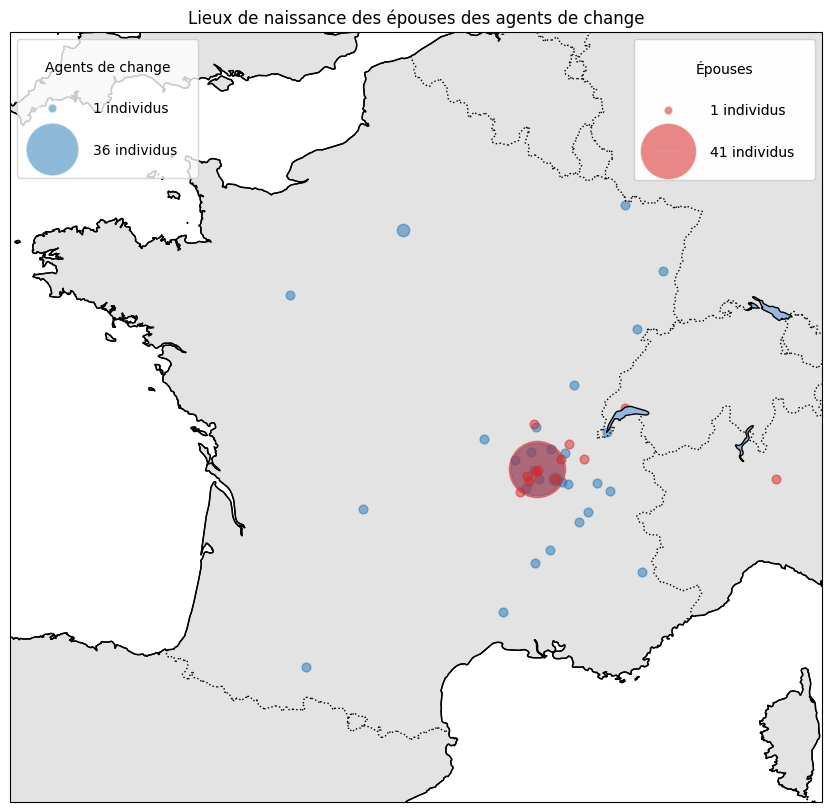

In [44]:
# Redéfinir la projection
projection = ccrs.LambertConformal(central_longitude=2.5, central_latitude=46.5, standard_parallels=(44, 49))

# Recréer la carte avec la légende ajustée
fig, ax = plt.subplots(figsize=(12, 10), subplot_kw={'projection': projection})
ax.set_extent([-4.3, 9.5, 41.3, 51.2])

# Ajoutez les caractéristiques géographiques
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor=land_color)
ax.add_feature(cfeature.LAKES, edgecolor='black')

# Placer les points sur la carte avec une taille proportionnelle au nombre de personnes
for index, row in aggregated_df_h.iterrows():
    ax.scatter(row["longitude"], row["latitude"], s=row["counts"]*40, color=point_color_h, alpha=0.5, transform=ccrs.PlateCarree())

# Placer les points sur la carte avec une taille proportionnelle au nombre de personnes
for index, row in aggregated_df_f.iterrows():
    ax.scatter(row["longitude"], row["latitude"], s=row["counts"]*40, color=point_color_f, alpha=0.5, transform=ccrs.PlateCarree())

legend_h = ax.legend(handles=legend_handles_h,
          labels=legend_labels_h,
          title="Agents de change",
          loc="upper left",
          borderpad=1.5,
          labelspacing=2,
          handletextpad=2)
ax.add_artist(legend_h)

legend_f = ax.legend(handles=legend_handles_f,
          labels=legend_labels_f,
          title="Épouses",
          loc="upper right",
          borderpad=1.5,
          labelspacing=2,
          handletextpad=2)
ax.add_artist(legend_f)

plt.title("Lieux de naissance des épouses des agents de change")
plt.show()
